## Inersertion Sort

In [2]:
def insertion_sort(a):
        zaehler = 0
        for i in range(len(a)):
                j=i
                while j>0:
                        ## die Feldbedingung für "while" haben wir extrahiert, sodass wir alle vergleiche zaehlen können.
                        zaehler += 1
                        if a[j-1] > a[j]:
                                a[j-1], a[j] = a[j], a[j-1]
                                j= j-1
                        else: break
        return zaehler
#main
import random
N = 20
a = list(range(N))
random.shuffle(a)
print(insertion_sort(a))
a=[1,5,6,4]
print(insertion_sort(a))


136
5


## Quick Sort Implementation für Vergleichszaehlungen

In [3]:
import random

def quick_sort(a):
    return quicksortImpl (a,0,len(a)-1)
    
def quicksortImpl(a,l,r):
    counter = 0
    if r > l:
        k, part_counter = partition(a, l, r)

        counter += part_counter
        counter += quicksortImpl(a,l, k-1)
        counter += quicksortImpl(a,k+1, r)
    return counter

def partition (a,l,r):
    counter = 0

    m=random.randint(l,r)
    a[m], a[r] = a[r], a[m]
    pivot = a[r]
    i= l
    j= r-1
    while True:
        while i < r:
            counter+=1
            if a[i]<= pivot:
                i= i+1
            else: break
        while j > l:
            counter+=1
            if a[j]>= pivot:
                j= j-1
            else: break
        if i<j:
            a[i], a[j]= a[j], a[i]
        else: 
            break        
    a[r]= a[i]

    a[i]= pivot
    return i, counter
#main 
#a= [1,2,3,4,5]
#print("anzahl der Vertauschungen:", quick_sort(a))
#print(a)
#print(zaehlliste)
#b=[1,2,3,4,5]
#print("Anzahl der Vertauschungen:", quick_sort(b))

## Plotting fuer Vergleiche mit Unsortierten Arrays

In [4]:
import matplotlib
import random
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
N = np.arange(0.0, 200, 10.0)
insertfeld = []
quickfeld = []
#wir brauchen ein Feld mit den Größen zum plotten
for i in range(20):
    a = list(range(10*i))
    random.shuffle(a)
    insertfeld.append(insertion_sort(a))
    b = list (range(10*i))
    random.shuffle(b)
    quickfeld.append(quick_sort(b))
c_1 = 1/(3.2)* N**2
c_2 = 1.38* N* np.log2(N)

fig, ax = plt.subplots()
ax.plot(N, c_2, label = 'Theoretischer quicksort')
ax.plot (N,c_1, label = 'Theoretischer insertionsort')
ax.plot(N, insertfeld, label = 'Unser insertionsort')
ax.plot(N, quickfeld, label = 'Unser quicksort')

ax.legend (loc='upper left')

ax.set(xlabel='Länge des Arrays N', ylabel='Anzahl der Vergleiche',
       title='Mit unsortieren Arrays')
ax.grid()

fig.savefig("test.png")
plt.show()
#clear all vars
quickfeld.clear()
insertfeld.clear()

## QuickSort Implementation 2 mit ungeschicktem Pivot El (immer rechts)

In [5]:
#ungeschicktes pivot element
import random

def quick_sort2(a):
    return quicksortImpl2 (a,0,len(a)-1)

def quicksortImpl2(a,l,r):
    counter = 0
    if r > l:
        k, part_counter = partition2(a, l, r)

        counter += part_counter
        counter += quicksortImpl2(a,l, k-1)
        counter += quicksortImpl2(a,k+1, r)
    return counter

def partition2 (a,l,r):
    counter = 0
    pivot = a[r]
    i= l
    j= r-1
    while True:
        while i < r:
            counter+=1
            if a[i]<= pivot:
                i= i+1
            else: break
        while j > l:
            counter+=1
            if a[j]>= pivot:
                j= j-1
            else: break
        if i<j:
            a[i], a[j]= a[j], a[i]
        else: 
            break        
    a[r]= a[i]

    a[i]= pivot
    return i, counter


## Plotting quicksort1 vs. quicksort2 mit sort. Arrays

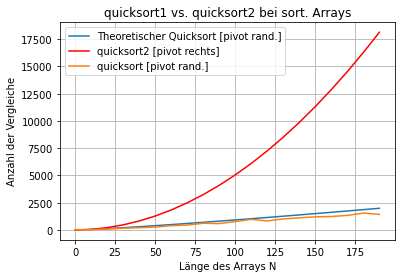

In [6]:
#Visualisierung ungeschicktes element
# Data for plotting
N = np.arange(0.0, 200, 10.0)
quick2feld = []
quickfeld = []
#wir brauchen ein Feld mit den Größen zum plotten
#mit sortiertem Feld
for i in range(20):
    a = list(range(10*i))
    quick2feld.append(quick_sort2(a))
    b = list(range(10*i))
    quickfeld.append(quick_sort(b))

#Komplexität von insertionsort wird linear
#c_1 = 1* N
c_2 = 1.38* N* np.log2(N)

fig, ax = plt.subplots()
ax.plot(N, c_2, label = 'Theoretischer Quicksort [pivot rand.]')
#ax.plot (N,c_1, label = 'c_1')
ax.plot(N, quick2feld, '-r', label = 'quicksort2 [pivot rechts]')
ax.plot(N, quickfeld, label = 'quicksort [pivot rand.]')

ax.legend (loc='upper left')

ax.set(xlabel='Länge des Arrays N', ylabel='Anzahl der Vergleiche',
       title='quicksort1 vs. quicksort2 bei sort. Arrays')
ax.grid()

fig.savefig("schlechterquick.png")
plt.show()

## Plotting fuer Sortieralg mit sortierten Arrays

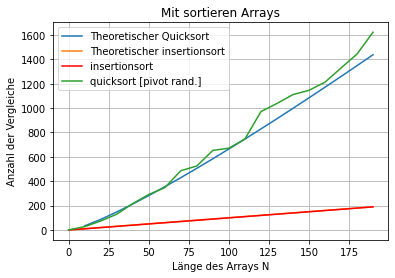

In [7]:
#graphen mit bereits sortieren Arrays
# Data for plotting
N = np.arange(0.0, 200, 10.0)
insertfeld = []
quickfeld = []
#wir brauchen ein Feld mit den Größen zum plotten
for i in range(20):
    a = list(range(10*i))
    insertfeld.append(insertion_sort(a))
    b = list(range(10*i))
    quickfeld.append(quick_sort(b))

#Komplexität von insertionsort wird linear
c_1 = 1* N
#c_2 = 1/2* N* np.log2(N)
c_2 =  N* np.log2(N)

fig, ax = plt.subplots()
ax.plot(N, c_2, label = 'Theoretischer Quicksort')
ax.plot (N,c_1, label = 'Theoretischer insertionsort')
ax.plot(N, insertfeld, '-r', label = 'insertionsort')
ax.plot(N, quickfeld, label = 'quicksort [pivot rand.]')

ax.legend (loc='upper left')

ax.set(xlabel='Länge des Arrays N', ylabel='Anzahl der Vergleiche',
       title='Mit sortieren Arrays')
ax.grid()

fig.savefig("sortierearrays.png")
plt.show()

## Zeitmessung

In [8]:
import timeit
import random
code_to_be_measured = '''
quick_sort(a)
'''
initialisation = '''
import random
from __main__ import quick_sort
N = 1000
a = list(range(N))
random.shuffle(a)
'''
t = timeit.Timer(code_to_be_measured, initialisation)

M = 100
time = t.timeit(M)# run ’code_to_be_measured’ M times
print("average execution time:", time / M)

average execution time: 0.007593480999998974


## geplottete Zeitmessung

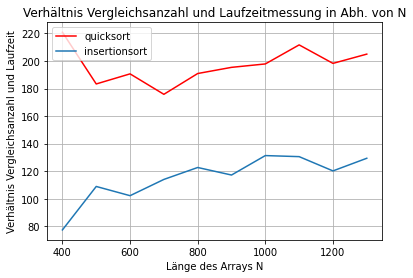

In [14]:
import random
import timeit

N = np.arange(400.0, 1400, 100.0)
insertarray = []
quickarray = []
resultarrayquick = []
resultarrayinsert = []
M=100

#erstelle unsortiertes array
def setup(N):
    a = list(range(N))
    random.shuffle(a)
    return a

code_to_be_measured_quick = '''
quick_sort(data)
'''

code_to_be_measured_insert = '''
insertion_sort (data)
'''

for i in range(10):
    setup_code = 'from __main__ import quick_sort,insertion_sort,setup; data = setup(' + str(400+ 100*i) + ')'

    t_quick = timeit.Timer(code_to_be_measured_quick,setup_code)
    
    #verkleinern um Konstante für Plot
    runtime_quick = t_quick.timeit(M)/M

    
    #Berechnung des Quotienten:
    resultarrayquick.append((1.38* (400+ 100*i)* np.log2(400+ 100*i))/(runtime_quick*10000)) 
   
    t_insert = timeit.Timer(code_to_be_measured_insert, setup_code)
    runtime_insert = t_insert.timeit(M)/M
    resultarrayinsert.append((1/(3.2)* (400+ 100*i)**2)/(runtime_insert*1000000))


fig, ax = plt.subplots()
ax.plot(N, resultarrayquick, '-r', label = 'quicksort')
ax.plot(N, resultarrayinsert, label = 'insertionsort')

ax.legend (loc='upper left')

ax.set(xlabel='Länge des Arrays N', ylabel='Verhältnis Vergleichsanzahl und Laufzeit',
       title='Verhältnis Vergleichsanzahl und Laufzeitmessung in Abh. von N')
ax.grid()

plt.show()

#man sieht, dass es mit den N, die wir wählen, das Verhältnis auf einem kleinen Intervall schwankt, wegen der randomisierten Wahl des Pivotelements

